<a href="https://colab.research.google.com/github/gayatripendhari/DataScience_Training/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Elbow method is used to chooose the value of K in k-mean clusering algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D #for 3d visualization

In [2]:
stockdata = pd.read_csv('https://raw.githubusercontent.com/djcrow-instructor/datasets/main/StockDataWithoutClusters_v2.csv')

In [3]:
stockdata.head()

,Company,Sector,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
0,Hindustan Oil Exploration Company Ltd.,Crude Oil,68.40,131.299505,0.8371,1.136947,-1.000000,-0.046311,-0.923766,4.533827,-1.0,90.794979
1,United Breweries (Holdings) Ltd.,Alcohol,40.00,39.316572,0.4766,0.162805,-1.000000,-0.535856,-1.000000,158.744001,-1.0,38.169257
2,Hindustan Motors Ltd.,Auto & Auto Anc.,7.15,21.946366,0.6766,0.041085,-0.868864,-1.000000,-1.000000,6.880137,-1.0,-8.333333
3,HMT Ltd.,Industrials,42.85,477.697516,0.0631,0.013322,-0.183166,-0.167937,-1.000000,5.865182,-1.0,-23.070018
4,ABG Shipyard Ltd.,Industrials,31.10,24.718436,0.8177,0.178504,-0.766749,-0.051679,-0.865160,182.175768,-1.0,-57.014513


In [4]:
stockdata.shape

(1225, 12)

In [5]:
stockdata['Sector'].value_counts()[0:20]

Chemicals           87
Cap. Goods          85
Auto & Auto Anc.    80
Textile             72
IT                  70
FMCG                56
Healthcare          50
Realty              49
Infra.              46
Iron & Steel        38
Media & Ent.        36
Pharma              35
Const. Materials    35
Metals & Mining     35
Plastic Products    30
Misc.               27
Cons. Durable       26
Agri                25
Hospitality         24
Auto Anc            22
Name: Sector, dtype: int64

In [7]:
stockdata.describe()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,524.523282,1007.097584,0.424991,1.476287,0.058122,0.134832,0.076953,137.198393,0.030488,7.087798
std,1975.921838,3977.721963,0.156296,4.790404,0.252640,0.158477,0.170725,318.540047,0.174218,50.988015
min,0.350000,1.027453,0.062600,0.000004,-1.000000,-1.000000,-1.000000,0.234502,-1.000000,-91.128010
25%,60.550000,40.744259,0.291800,0.029050,0.013930,0.054159,0.033746,24.568699,0.006542,-21.670429
50%,170.100000,113.898556,0.403800,0.123546,0.089812,0.116647,0.076953,56.775656,0.039354,-1.576713
75%,448.050000,417.201805,0.512300,0.548840,0.170942,0.196777,0.133447,125.772649,0.086485,25.083403
max,51579.200000,66127.302990,1.000000,52.834197,1.000000,1.000000,1.000000,6136.311392,1.000000,586.043761


In [8]:
stockdata['Free Float Market Cap %'] = stockdata['Free Float Market Cap %']*100
stockdata['RoE %'] = stockdata['RoE %']*100
stockdata['RoCE %'] = stockdata['RoCE %']*100
stockdata['EBIT Margin %'] = stockdata['EBIT Margin %']*100
stockdata['PAT %']=stockdata['PAT %']*100
stockdata.head()

,Company,Sector,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
0,Hindustan Oil Exploration Company Ltd.,Crude Oil,68.40,131.299505,83.71,1.136947,-100.000000,-4.631076,-92.376614,4.533827,-100.0,90.794979
1,United Breweries (Holdings) Ltd.,Alcohol,40.00,39.316572,47.66,0.162805,-100.000000,-53.585573,-100.000000,158.744001,-100.0,38.169257
2,Hindustan Motors Ltd.,Auto & Auto Anc.,7.15,21.946366,67.66,0.041085,-86.886405,-100.000000,-100.000000,6.880137,-100.0,-8.333333
3,HMT Ltd.,Industrials,42.85,477.697516,6.31,0.013322,-18.316590,-16.793735,-100.000000,5.865182,-100.0,-23.070018
4,ABG Shipyard Ltd.,Industrials,31.10,24.718436,81.77,0.178504,-76.674860,-5.167934,-86.515956,182.175768,-100.0,-57.014513


In [9]:
stockdata.describe()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,524.523282,1007.097584,42.499110,1.476287,5.812153,13.483160,7.695264,137.198393,3.048752,7.087798
std,1975.921838,3977.721963,15.629644,4.790404,25.264010,15.847713,17.072537,318.540047,17.421837,50.988015
min,0.350000,1.027453,6.260000,0.000004,-100.000000,-100.000000,-100.000000,0.234502,-100.000000,-91.128010
25%,60.550000,40.744259,29.180000,0.029050,1.393013,5.415892,3.374554,24.568699,0.654241,-21.670429
50%,170.100000,113.898556,40.380000,0.123546,8.981234,11.664688,7.695264,56.775656,3.935423,-1.576713
75%,448.050000,417.201805,51.230000,0.548840,17.094221,19.677723,13.344717,125.772649,8.648472,25.083403
max,51579.200000,66127.302990,100.000000,52.834197,100.000000,100.000000,100.000000,6136.311392,100.000000,586.043761


In [10]:
features = stockdata.columns[2:]
features

Index(['Price', 'Market Cap', 'Free Float Market Cap %', '6m ADV', 'RoE %',
       'RoCE %', 'EBIT Margin %', 'EPS', 'PAT %', 'Stock Return %'],
      dtype='object')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
stockdataFeatures_scaled =scaler.fit_transform(stockdata[features])
stockdataFeatures_scaled =pd.DataFrame(stockdataFeatures_scaled,columns=features)
stockdataFeatures_scaled.describe()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,0.010163,0.015214,0.386592,0.027942,0.529061,0.567416,0.538476,0.022321,0.515244,0.145038
std,0.038309,0.060153,0.166734,0.090669,0.126320,0.079239,0.085363,0.051913,0.087109,0.075296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001167,0.000601,0.244506,0.000550,0.506965,0.527079,0.516873,0.003966,0.503271,0.102570
50%,0.003291,0.001707,0.363985,0.002338,0.544906,0.558323,0.538476,0.009215,0.519677,0.132243
75%,0.008680,0.006294,0.479731,0.010388,0.585471,0.598389,0.566724,0.020459,0.543242,0.171613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
type(stockdataFeatures_scaled)

pandas.core.frame.DataFrame

In [ ]:
#stockdataFeatures_scaled['Sector'] = stockdata['Sector']

In [14]:
stockdataFeatures_scaled.head()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
0,0.001319,0.001970,0.826221,0.021519,0.000000,0.476845,0.038117,0.000701,0.0,0.268651
1,0.000769,0.000579,0.441647,0.003081,0.000000,0.232072,0.000000,0.025832,0.0,0.190937
2,0.000132,0.000316,0.655003,0.000778,0.065568,0.000000,0.000000,0.001083,0.0,0.122265
3,0.000824,0.007208,0.000533,0.000252,0.408417,0.416031,0.000000,0.000918,0.0,0.100503
4,0.000596,0.000358,0.805526,0.003378,0.116626,0.474160,0.067420,0.029651,0.0,0.050376


In [15]:
#stockdataFeatures_scaled['Sector'].value_counts()[0:20]

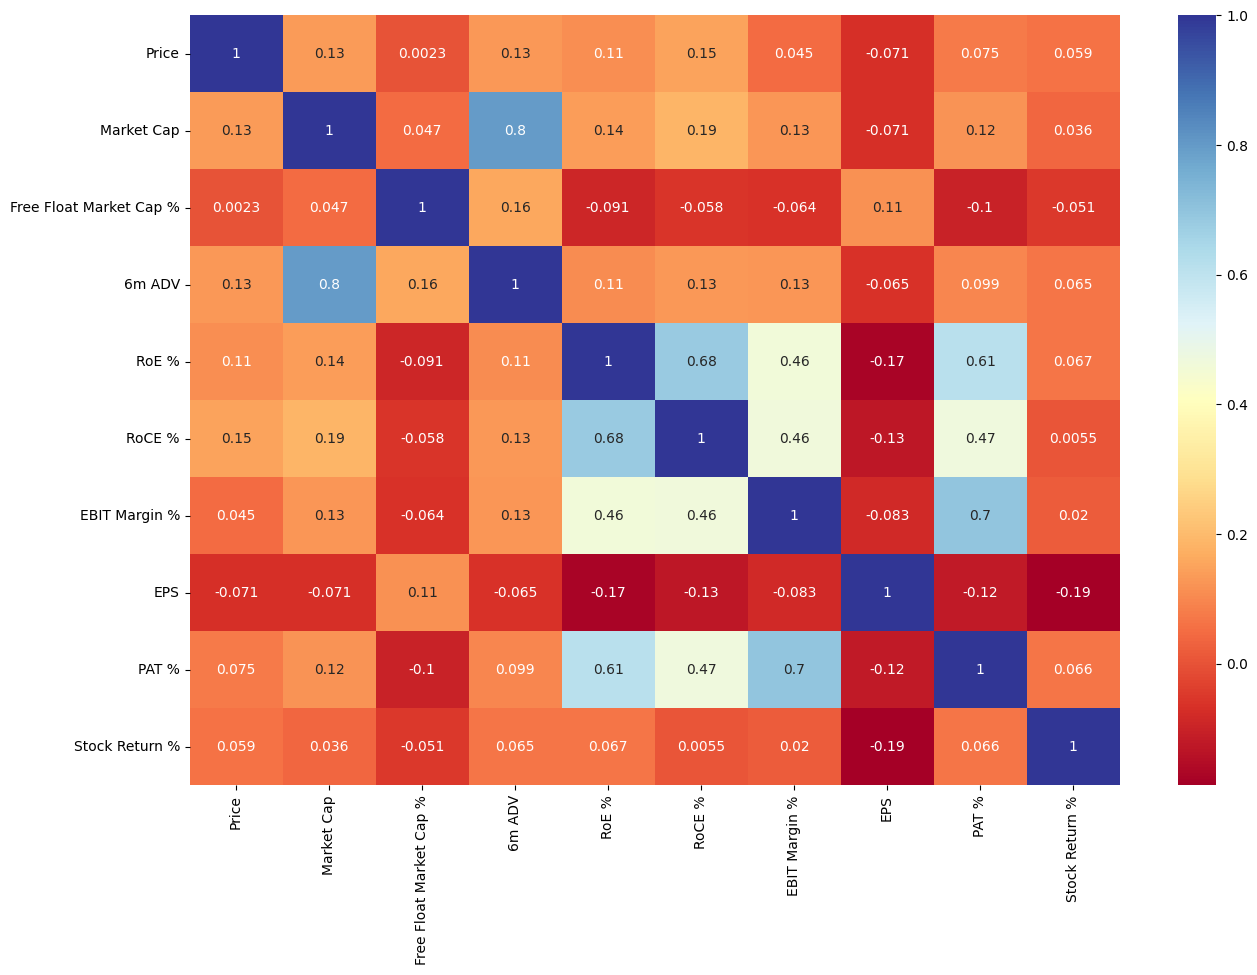

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(stockdataFeatures_scaled.corr(),annot = True,cmap = "RdYlBu")
plt.draw()


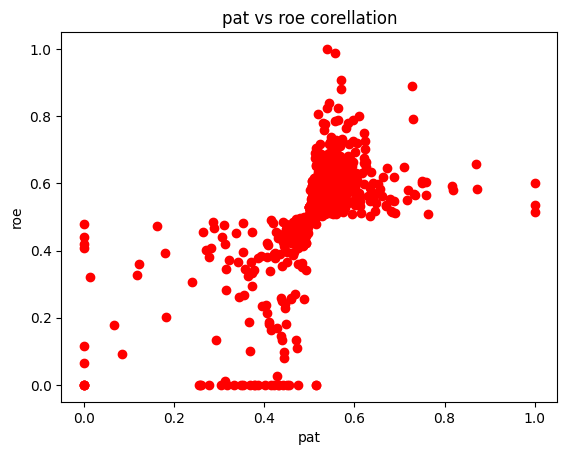

In [17]:
plt.scatter(stockdataFeatures_scaled['PAT %'],stockdataFeatures_scaled['RoE %'],c = 'red')
plt.title('pat vs roe corellation')
plt.xlabel('pat')
plt.ylabel('roe')
plt.show()

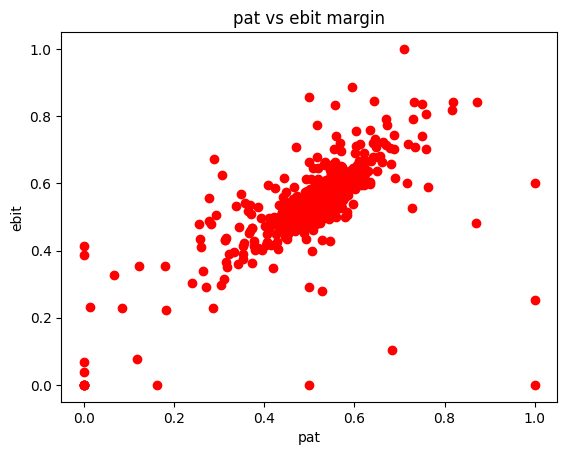

In [18]:
plt.scatter(stockdataFeatures_scaled['PAT %'],stockdataFeatures_scaled['EBIT Margin %'],c = 'red')
plt.title('pat vs ebit margin')
plt.xlabel('pat')
plt.ylabel('ebit')
plt.show()

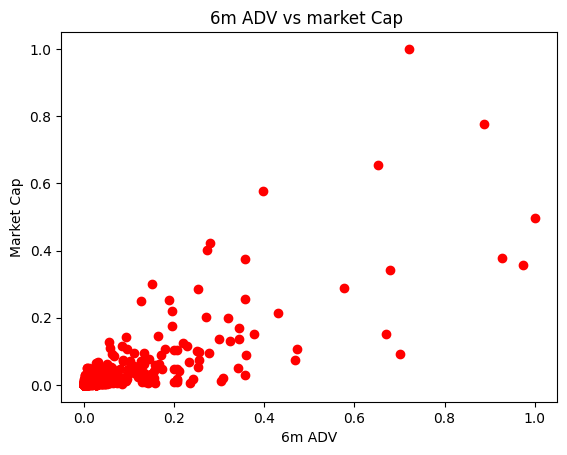

In [19]:
plt.scatter(stockdataFeatures_scaled['6m ADV'],stockdataFeatures_scaled['Market Cap'],c = 'red')
plt.title('6m ADV vs market Cap ')
plt.xlabel('6m ADV')
plt.ylabel('Market Cap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

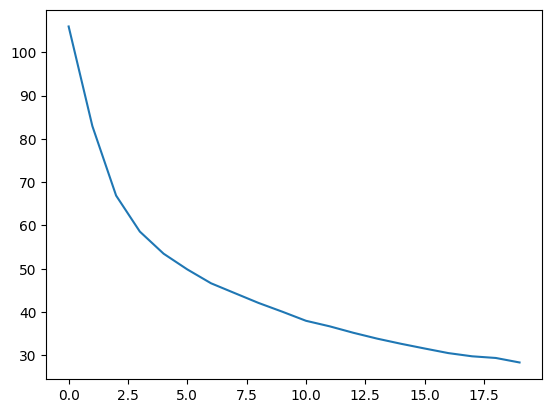

In [20]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state=10)
    model_clus.fit(stockdataFeatures_scaled)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)


In [21]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state=10)
model_clus5.fit(stockdataFeatures_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5, random_state=10)

In [22]:
model_clus5.labels_

array([1, 1, 1, ..., 2, 2, 3], dtype=int32)

In [23]:
np.unique(model_clus5.labels_,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([471,  85, 462, 179,  28]))

In [24]:
stock_data2= pd.concat([stockdataFeatures_scaled, pd.Series(model_clus5.labels_)], axis=1)
stock_data2.head()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %,0
0,0.001319,0.001970,0.826221,0.021519,0.000000,0.476845,0.038117,0.000701,0.0,0.268651,1
1,0.000769,0.000579,0.441647,0.003081,0.000000,0.232072,0.000000,0.025832,0.0,0.190937,1
2,0.000132,0.000316,0.655003,0.000778,0.065568,0.000000,0.000000,0.001083,0.0,0.122265,1
3,0.000824,0.007208,0.000533,0.000252,0.408417,0.416031,0.000000,0.000918,0.0,0.100503,1
4,0.000596,0.000358,0.805526,0.003378,0.116626,0.474160,0.067420,0.029651,0.0,0.050376,1


In [25]:
stock_data2.rename(columns = {0:'clusters'}, inplace = True)
stock_data2['clusters'].value_counts()

0    471
2    462
3    179
1     85
4     28
Name: clusters, dtype: int64

In [26]:
stock_data2.head()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %,clusters
0,0.001319,0.001970,0.826221,0.021519,0.000000,0.476845,0.038117,0.000701,0.0,0.268651,1
1,0.000769,0.000579,0.441647,0.003081,0.000000,0.232072,0.000000,0.025832,0.0,0.190937,1
2,0.000132,0.000316,0.655003,0.000778,0.065568,0.000000,0.000000,0.001083,0.0,0.122265,1
3,0.000824,0.007208,0.000533,0.000252,0.408417,0.416031,0.000000,0.000918,0.0,0.100503,1
4,0.000596,0.000358,0.805526,0.003378,0.116626,0.474160,0.067420,0.029651,0.0,0.050376,1


In [28]:
stock_data2.tail()

,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %,clusters
1220,0.000065,0.000760,0.376574,0.000969,0.529061,0.567416,0.538476,0.022321,0.515244,0.066663,2
1221,0.000233,0.000998,0.863132,0.001526,0.529061,0.567416,0.538476,0.022321,0.515244,0.076299,3
1222,0.001573,0.000398,0.465543,0.003392,0.529061,0.567416,0.538476,0.022321,0.515244,0.085711,2
1223,0.002894,0.001251,0.413271,0.006648,0.529061,0.567416,0.538476,0.022321,0.515244,0.108383,2
1224,1.000000,0.048648,0.706742,0.172448,0.529061,0.567416,0.538476,0.022321,0.515244,0.175345,3


In [31]:
clusDesc = pd.DataFrame(stock_data2.groupby('clusters').mean().round(3))
clusDesc.insert(0,'size',stock_data2['clusters'].value_counts())

In [32]:
clusDesc

,size,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
clusters,,,,,,,,,,,
0,471,0.011,0.010,0.236,0.011,0.555,0.577,0.552,0.016,0.534,0.148
1,85,0.002,0.003,0.411,0.009,0.182,0.448,0.381,0.036,0.312,0.120
2,462,0.008,0.008,0.426,0.020,0.563,0.581,0.552,0.021,0.530,0.149
3,179,0.012,0.008,0.654,0.026,0.526,0.554,0.537,0.036,0.519,0.135
4,28,0.036,0.303,0.487,0.503,0.609,0.630,0.577,0.011,0.552,0.166


<Axes: xlabel='clusters', ylabel='Free Float Market Cap %'>

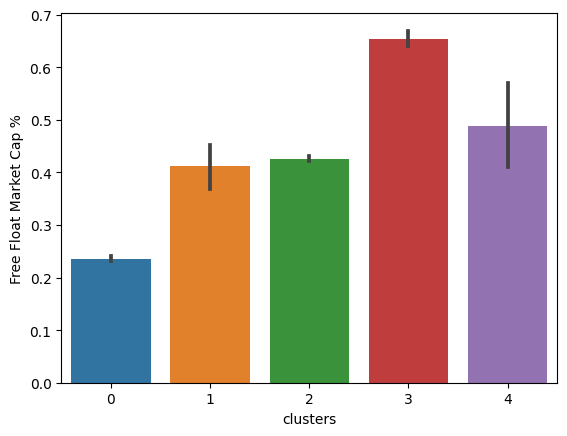

In [33]:
sns.barplot(x=stock_data2['clusters'], y=stock_data2['Free Float Market Cap %'])

<Axes: xlabel='clusters', ylabel='Stock Return %'>

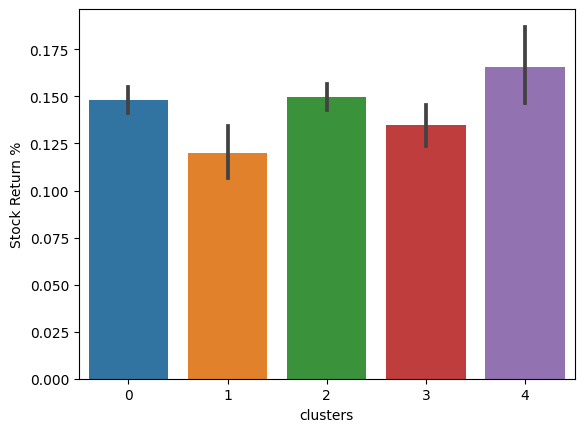

In [34]:
sns.barplot(x=stock_data2['clusters'], y=stock_data2['Stock Return %'])

<Axes: xlabel='clusters', ylabel='Price'>

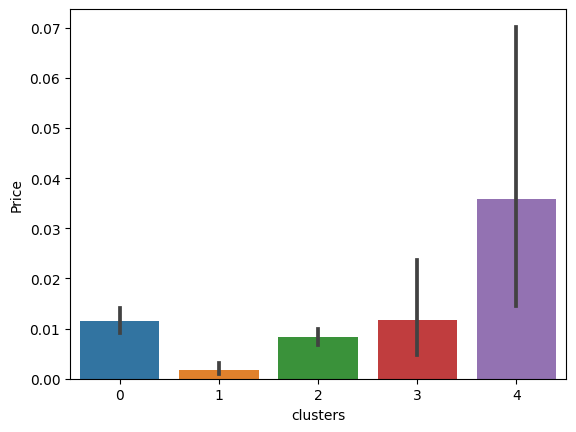

In [35]:
sns.barplot(x=stock_data2['clusters'], y=stock_data2['Price'])

<Axes: xlabel='clusters', ylabel='EBIT Margin %'>

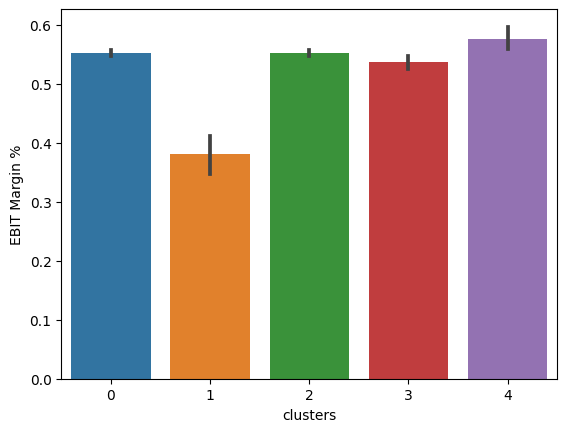

In [36]:
sns.barplot(x=stock_data2['clusters'], y=stock_data2['EBIT Margin %'])